In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


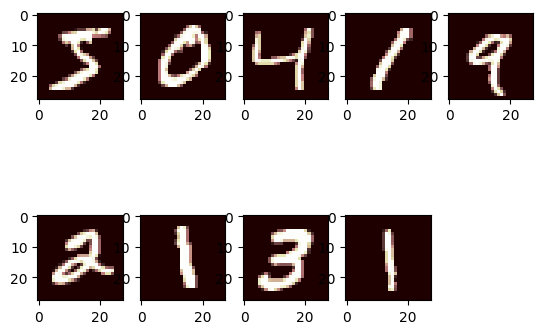

In [4]:
for i in range(9):
    plt.subplot(250 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('pink'))
plt.show()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalizing

In [6]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [7]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
print(x_train.shape[0])

60000


In [9]:
print((x_train.shape[1:]))

(28, 28)


In [10]:
print(np.prod(x_train.shape[1:]))

784


In [11]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


## One hot encoding the Target variable

In [13]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [14]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


## 1. Basic Network with 1 Hidden Layer

In [15]:
model1 = Sequential()
model1.add(Dense(512, input_shape=(784,), activation='relu'))  # Assuming input size is 784 (e.g., for flattened MNIST images)
model1.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (e.g., for classification)

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
784*512 + 512

401920

In [18]:
history = model1.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8757 - loss: 0.4549 - val_accuracy: 0.9576 - val_loss: 0.1414
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9666 - loss: 0.1178 - val_accuracy: 0.9703 - val_loss: 0.0936
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9799 - loss: 0.0703 - val_accuracy: 0.9787 - val_loss: 0.0723


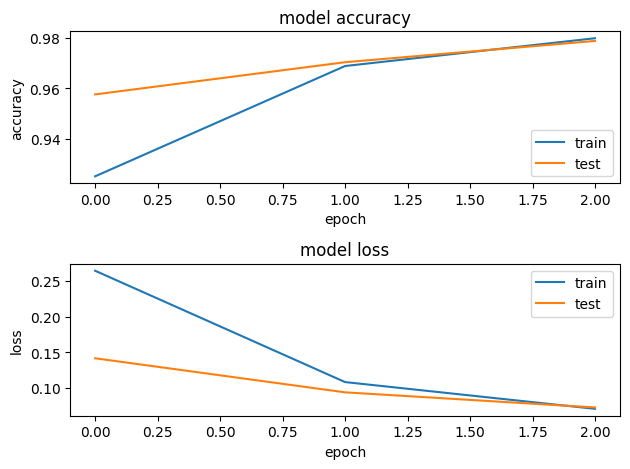

In [19]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [20]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 6s - 3ms/step - accuracy: 0.9855 - loss: 0.0500
Train Loss 0.05004696920514107
Train Accuracy 0.9854666590690613


In [21]:
loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.9787 - loss: 0.0723
Test Loss 0.07232505828142166
Test Accuracy 0.9786999821662903


## 2. Network with 2 Hidden Layers

In [22]:
model2= Sequential()

In [23]:
# Define the model
model2 = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),  # Assuming input size is 784 (e.g., for flattened MNIST images)
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (e.g., for classification)
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8765 - loss: 0.4432 - val_accuracy: 0.9576 - val_loss: 0.1381
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9710 - loss: 0.0980 - val_accuracy: 0.9732 - val_loss: 0.0845
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9841 - loss: 0.0535 - val_accuracy: 0.9764 - val_loss: 0.0794
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0913


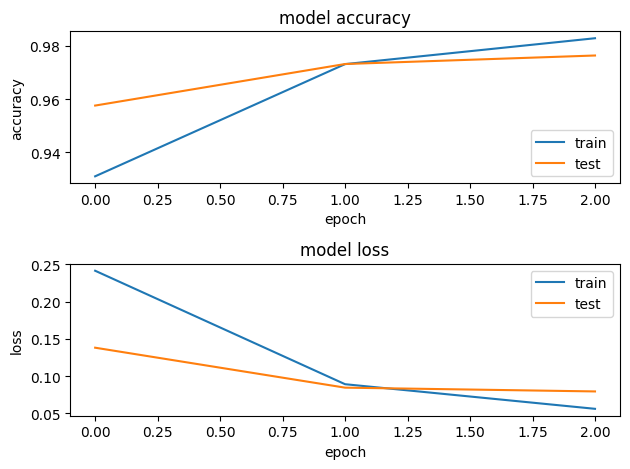

In [25]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [26]:
loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - 3ms/step - accuracy: 0.9868 - loss: 0.0442
Train Loss 0.04422177001833916
Train Accuracy 0.9868166446685791


In [27]:
loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 4ms/step - accuracy: 0.9764 - loss: 0.0794
Test Loss 0.07939832657575607
Test Accuracy 0.9764000177383423


## 3. Network with 3 Hidden Layers

In [28]:
model3= Sequential()

In [29]:
model3.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))
model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464,330 (1.77 MB)

 Trainable params: 464,330 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model3.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1088 - loss: 2.3193 - val_accuracy: 0.1135 - val_loss: 2.2945
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.1169 - loss: 2.2942 - val_accuracy: 0.1378 - val_loss: 2.2897
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1290 - loss: 2.2885 - val_accuracy: 0.1157 - val_loss: 2.2832
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1175 - loss: 2.2843


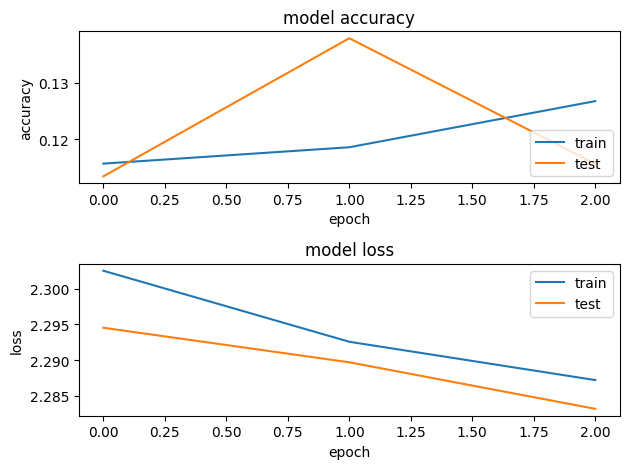

In [31]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [32]:
loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 6s - 3ms/step - accuracy: 0.1139 - loss: 2.2838
Train Loss 2.2838258743286133
Train Accuracy 0.11394999921321869


In [33]:
loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.1157 - loss: 2.2832
Test Loss 2.283179759979248
Test Accuracy 0.11569999903440475


## 4. Network with 2 layers and ReLU as an activation func for 1 layer

In [34]:
model4= Sequential()

In [35]:
model4.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(n_classes, activation = 'softmax'))
model4.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,230 (1.73 MB)

 Trainable params: 454,230 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model4.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.3812 - loss: 2.1187 - val_accuracy: 0.6834 - val_loss: 1.5225
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7240 - loss: 1.3684 - val_accuracy: 0.8038 - val_loss: 0.9286
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8106 - loss: 0.8653 - val_accuracy: 0.8455 - val_loss: 0.6640
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8258 - loss: 0.7200


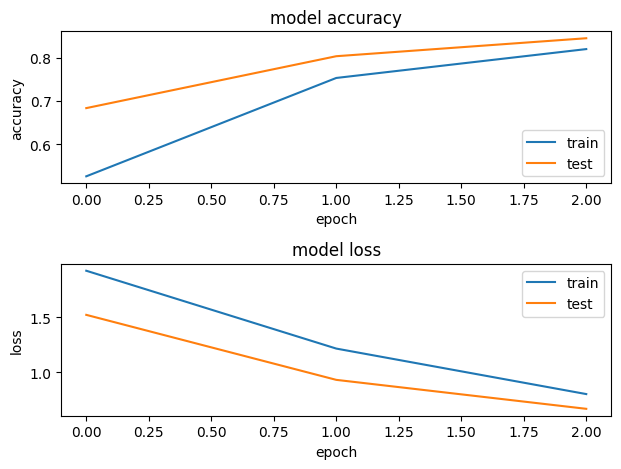

In [37]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [38]:
loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 6s - 3ms/step - accuracy: 0.8376 - loss: 0.6828
Train Loss 0.6827871799468994
Train Accuracy 0.8375999927520752


In [39]:
loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.8455 - loss: 0.6640
Test Loss 0.6639966368675232
Test Accuracy 0.8454999923706055


## 5. Network with 2 layers and ReLU as an activation func for 1 layer and ADAM optimiser

In [40]:
model5= Sequential()

In [41]:
model5.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model5.add(Dense(100, activation = 'relu'))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,230 (1.73 MB)

 Trainable params: 454,230 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model5.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7912 - loss: 0.7459 - val_accuracy: 0.9258 - val_loss: 0.2547
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9315 - loss: 0.2330 - val_accuracy: 0.9422 - val_loss: 0.1931
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9508 - loss: 0.1672 - val_accuracy: 0.9541 - val_loss: 0.1452
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9463 - loss: 0.1671


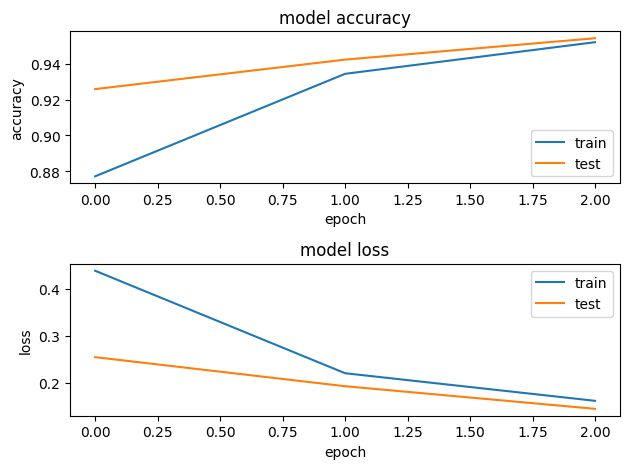

In [43]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [44]:
loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 6s - 3ms/step - accuracy: 0.9596 - loss: 0.1344
Train Loss 0.1343860775232315
Train Accuracy 0.9595999717712402


In [45]:
loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 2s - 5ms/step - accuracy: 0.9541 - loss: 0.1452
Test Loss 0.14516301453113556
Test Accuracy 0.9541000127792358


## 6. Network with BatchNormalization

In [46]:
model6= Sequential()

In [47]:
# Define the model
model6 = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),  # Assuming input size is 784 (e.g., for flattened MNIST images)
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')  # Output layer with 10 classes (e.g., for classification)
])

# Compile the model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model6.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9018 - loss: 0.3325 - val_accuracy: 0.9689 - val_loss: 0.1038
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9785 - loss: 0.0727 - val_accuracy: 0.9680 - val_loss: 0.1003
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9864 - loss: 0.0447 - val_accuracy: 0.9748 - val_loss: 0.0802
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9701 - loss: 0.0915


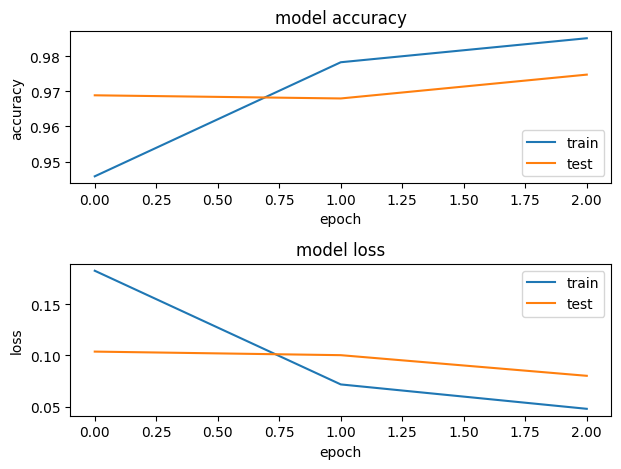

In [49]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [50]:
loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 7s - 4ms/step - accuracy: 0.9876 - loss: 0.0401
Train Loss 0.04008619859814644
Train Accuracy 0.9876333475112915


In [54]:
loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.9748 - loss: 0.0802
Test Loss 0.08017109334468842
Test Accuracy 0.9747999906539917


## 7. Network with Dropout, L2 regularizer, kernel initializer

In [55]:
model7= Sequential()

In [56]:
model7.add(Dropout(0.2,input_shape=(784,)))
model7.add(Dense(512, activation= 'sigmoid',kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(100, activation = 'relu', kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(n_classes, activation = 'softmax'))
model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

TypeError: L2.__init__() got an unexpected keyword argument 'l'

In [ ]:
history = model7.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=True)

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

In [ ]:
loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
model1
training : 99
test: 97